In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# conda install -c conda-forge basemap-data-hires=1.0.8.dev0
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import pyproj
from pyproj import Proj
from matplotlib.path import Path
# Inline plots for ease of visualisation
%matplotlib inline

In [26]:
df = pd.read_csv('../train.csv') #csv read
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


We are after reasonable estimates of time taken to travel, not looking for interesting outliers, first order of business is to trim outliers

In [27]:
# from plots, reasonable to assume outliers > 15000 seconds are spurious, there is a distinct break in data here.
df = df[df["trip_duration"] < 15000]
# another distinct break under 60 seconds - assume trips under 60s are not trips

Calculate distances

In [28]:
myProj = Proj("+proj=utm +zone=18T, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
df['pickup_UTMx'], df['pickup_UTMy'] = myProj(df['pickup_longitude'].values, df['pickup_latitude'].values)
df['dropoff_UTMx'], df['dropoff_UTMy'] = myProj(df['dropoff_longitude'].values, df['dropoff_latitude'].values)

In [29]:
df['xdist'] = abs(df['dropoff_UTMx'] - df['pickup_UTMx'])
df['ydist'] = abs(df['dropoff_UTMy'] - df['pickup_UTMy'])

In [41]:
df['euc_dist'] = np.sqrt(df['xdist']**2 + df['ydist']**2)
df['m_dist'] = df['xdist'] + df['ydist']
# df['euc_dist'] = np.linalg.norm(x - y)

In [ ]:
# average speed
df['av_m_speed'] = df['m_dist'] / df['trip_duration']

In [43]:
df[(df["trip_duration"] < 60) & (df['m_dist'] > 20)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_UTMx,pickup_UTMy,dropoff_UTMx,dropoff_UTMy,xdist,ydist,euc_dist,m_dist
72,id1510700,2,2016-02-20 21:58:13,2016-02-20 21:59:10,1,-73.958397,40.772629,-73.955132,40.774242,N,57,587901.478791,4.514039e+06,588174.917153,4.514221e+06,273.438361,182.401314,328.692526,455.839675
853,id2730154,2,2016-03-29 22:39:46,2016-03-29 22:40:44,5,-73.982201,40.731812,-73.979950,40.734814,N,58,585945.185888,4.509484e+06,586131.368467,4.509820e+06,186.182579,335.467133,383.669324,521.649713
1107,id0729156,2,2016-06-23 13:36:48,2016-06-23 13:36:50,3,-73.827660,40.716175,-73.822113,40.711452,N,2,599018.394745,4.507911e+06,599493.910820,4.507393e+06,475.516075,517.974930,703.145480,993.491006
1492,id2456838,1,2016-01-13 20:11:46,2016-01-13 20:11:53,1,-73.793442,40.644814,-73.795242,40.644669,N,7,602017.324644,4.500029e+06,601865.301990,4.500011e+06,152.022654,18.178356,153.105650,170.201011
1538,id2281954,1,2016-03-18 16:01:05,2016-03-18 16:01:54,1,-73.949623,40.780830,-73.950386,40.777309,N,49,588631.015252,4.514958e+06,588571.314339,4.514567e+06,59.700913,391.626010,396.150389,451.326923
1570,id2843664,1,2016-02-06 15:27:14,2016-02-06 15:28:01,1,-73.984947,40.751949,-73.983559,40.751553,N,47,585687.405144,4.511717e+06,585805.133833,4.511674e+06,117.728689,42.683091,125.227355,160.411779
1764,id3852188,1,2016-01-07 16:20:39,2016-01-07 16:21:27,1,-73.978821,40.747700,-73.977631,40.747272,N,48,586210.072867,4.511251e+06,586311.104855,4.511205e+06,101.031989,46.257679,111.118115,147.289667
1882,id3899530,1,2016-02-27 00:13:39,2016-02-27 00:14:37,1,-73.982521,40.727421,-73.980583,40.730061,N,58,585923.775444,4.508997e+06,586084.024242,4.509292e+06,160.248797,294.930904,335.654458,455.179701
1989,id1895810,2,2016-04-04 00:32:53,2016-04-04 00:33:33,2,-73.979988,40.687759,-73.978554,40.685242,N,40,586188.805516,4.504597e+06,586313.253446,4.504318e+06,124.447930,278.072329,304.649811,402.520258
2458,id3831162,2,2016-02-18 20:26:11,2016-02-18 20:27:08,4,-74.007530,40.725426,-74.006859,40.729900,N,57,583814.280296,4.508751e+06,583865.361711,4.509248e+06,51.081415,497.356261,499.972560,548.437675


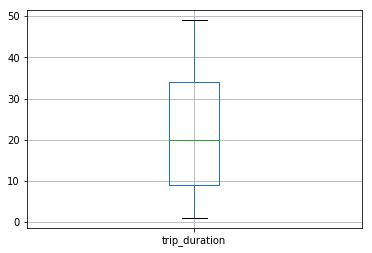

In [6]:
df[df["trip_duration"] < 60].boxplot(column="trip_duration")

(array([ 0.00383865,  0.01160734,  0.00870093,  0.00775041,  0.00769557,
         0.00577625,  0.00617839,  0.00500852,  0.00506336,  0.00506336,
         0.00451498,  0.00478917,  0.00467949,  0.00447842,  0.00424079,
         0.0045881 ,  0.00460638,  0.00435047,  0.00393004,  0.00424079,
         0.00409456,  0.00444186,  0.00425907,  0.00488057,  0.00526443,
         0.00436875,  0.00488057,  0.00520959,  0.00577625,  0.00283329,
         0.00645258,  0.00667194,  0.00679989,  0.00588593,  0.00672677,
         0.00807944,  0.00753106,  0.0090848 ,  0.00815256,  0.0086461 ,
         0.00912136,  0.0095235 ,  0.01040091,  0.01019984,  0.01202776,
         0.01244819,  0.01191809,  0.01336215,  0.01255786,  0.01303312,
         0.01403848,  0.01427611,  0.01491589,  0.01588469,  0.01595781,
         0.01639651,  0.01652446,  0.01795025,  0.01882765,  0.01796853]),
 array([   1.        ,    2.96666667,    4.93333333,    6.9       ,
           8.86666667,   10.83333333,   12.8       ,  

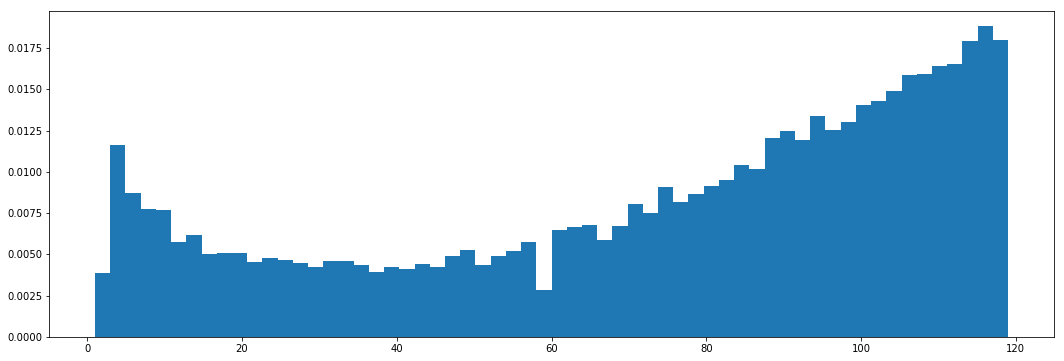

In [12]:
fig, ax = plt.subplots(figsize=(18, 6)) # Set figure to subplot
plt.hist(df.loc[df['trip_duration'] < 120, 'trip_duration'], normed=True, bins=60) #.value_counts().plot(ax=ax, kind='bar') 

Just dump any and every trip less than 60 seconds, they are problematic if too high a distance and problematic for other reasons if too low. You can see above there's a significant dip around 40-60s

In [75]:
df = df[df["trip_duration"] > 59]

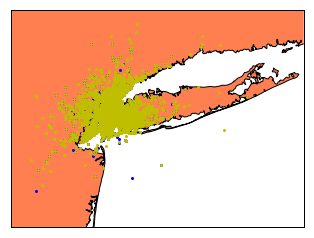

In [62]:
map = Basemap(projection='merc', lat_0 = 40.7, lon_0 = -74,
    resolution = 'h',
    llcrnrlon=-75.0, llcrnrlat=39.8,
    urcrnrlon=-71.8, urcrnrlat=41.6)

map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
x,y = map(list(df['pickup_longitude']), list(df['pickup_latitude']))
pu_locations = np.c_[x, y]
map.plot(x, y, 'bo', markersize=2)
x,y = map(list(df['dropoff_longitude']), list(df['dropoff_latitude']))
do_locations = np.c_[x, y]
map.plot(x, y, 'yo', markersize=2)
plt.show()

In [65]:
polygons = [Path(p.boundary) for p in map.landpolygons]

pu_result = np.zeros(len(pu_locations), dtype=bool) 
do_result = np.zeros(len(pu_locations), dtype=bool)

for polygon in polygons:
    pu_result += np.array(polygon.contains_points(pu_locations))
    do_result += np.array(polygon.contains_points(do_locations))
df['pickup_onland'] = pu_result
df['dropoff_onland'] = do_result

In [68]:
df[df['pickup_onland'] == False]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_UTMx,pickup_UTMy,dropoff_UTMx,dropoff_UTMy,xdist,ydist,euc_dist,m_dist,pickup_onland,dropoff_onland
868,id2243401,1,2016-03-30 07:07:26,2016-03-30 07:25:10,1,-74.008934,40.702156,-73.975960,40.755543,N,...,5.837249e+05,4.506167e+06,5.864415e+05,4.512125e+06,2716.577652,5958.240896,6548.314952,8674.818548,False,True
14027,id1742808,1,2016-01-03 12:56:08,2016-01-03 13:05:37,1,-74.009697,40.702015,-73.987305,40.721981,N,...,5.836606e+05,4.506150e+06,5.855268e+05,4.508388e+06,1866.169898,2237.936268,2913.923271,4104.106166,False,True
16439,id1650707,2,2016-06-04 19:04:48,2016-06-04 19:44:11,1,-73.923164,40.792793,-73.989510,40.758778,N,...,5.908473e+05,4.516313e+06,5.852935e+05,4.512471e+06,5553.811643,3842.619219,6753.558043,9396.430863,False,True
22114,id1339821,1,2016-04-18 09:29:00,2016-04-18 09:37:11,1,-73.942139,40.771526,-73.975761,40.789139,N,...,5.892750e+05,4.513933e+06,5.864147e+05,4.515855e+06,2860.366508,1921.448698,3445.817996,4781.815206,False,True
24094,id0105294,2,2016-06-14 22:44:01,2016-06-14 23:30:29,1,-74.001595,40.704304,-73.968552,40.786510,N,...,5.843422e+05,4.506412e+06,5.870264e+05,4.515570e+06,2684.170984,9157.794479,9543.058922,11841.965462,False,True
26854,id0602188,2,2016-04-19 08:28:27,2016-04-19 08:47:27,2,-73.971359,40.744251,-73.963257,40.765671,N,...,5.868445e+05,4.510876e+06,5.875005e+05,4.513262e+06,655.979252,2385.775636,2474.314887,3041.754887,False,True
27196,id1630285,1,2016-03-31 20:07:21,2016-03-31 20:36:27,2,-73.953239,40.763985,-73.902405,40.724289,N,...,5.883482e+05,4.513085e+06,5.926939e+05,4.508731e+06,4345.701088,4354.097802,6151.689656,8699.798890,False,True
28752,id1803116,1,2016-04-24 00:57:26,2016-04-24 01:07:57,1,-73.947502,40.764114,-73.953323,40.771503,N,...,5.888322e+05,4.513105e+06,5.883311e+05,4.513919e+06,501.113436,814.366506,956.194270,1315.479943,False,True
29551,id3516270,1,2016-06-09 14:00:57,2016-06-09 14:25:12,1,-73.947502,40.765045,-73.972656,40.749966,N,...,5.888310e+05,4.513208e+06,5.867276e+05,4.511509e+06,2103.448757,1699.100517,2703.967315,3802.549274,False,True
32251,id3149077,1,2016-03-10 04:42:22,2016-03-10 04:59:38,1,-73.954048,40.756664,-73.865692,40.771004,N,...,5.882896e+05,4.512271e+06,5.957274e+05,4.513956e+06,7437.760944,1684.449550,7626.116846,9122.210494,False,True


In [69]:
df[df['dropoff_onland']==False]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_UTMx,pickup_UTMy,dropoff_UTMx,dropoff_UTMy,xdist,ydist,euc_dist,m_dist,pickup_onland,dropoff_onland
1424,id3582105,2,2016-05-05 10:44:52,2016-05-05 10:56:23,1,-73.987518,40.728642,-74.009300,40.701939,N,...,585500.199621,4.509127e+06,583694.208119,4.506142e+06,1805.991502,2985.175937,3488.965560,4791.167439,True,False
2886,id3698250,1,2016-05-15 16:36:44,2016-05-15 17:31:35,1,-73.776741,40.645298,-73.951469,40.759697,N,...,603428.696444,4.500102e+06,588503.259339,4.512610e+06,14925.437105,12508.226072,19473.684609,27433.663178,True,False
2999,id1387399,2,2016-04-02 23:45:15,2016-04-02 23:48:01,1,-73.982819,40.738689,-73.972771,40.736721,N,...,585884.155317,4.510247e+06,586735.105850,4.510039e+06,850.950533,208.625580,876.151495,1059.576113,True,False
3088,id1147327,2,2016-06-08 07:20:00,2016-06-08 07:34:30,1,-73.945831,40.777782,-74.008041,40.702785,N,...,588955.040627,4.514624e+06,583799.495774,4.506237e+06,5155.544853,8386.412421,9844.366715,13541.957274,True,False
4860,id0713926,2,2016-01-12 22:33:26,2016-01-12 23:02:41,1,-74.001923,40.740719,-73.948540,40.763458,N,...,584268.551846,4.510454e+06,588745.546056,4.513031e+06,4476.994210,2576.862845,5165.626707,7053.857055,True,False
5395,id3559291,2,2016-01-12 17:32:05,2016-01-12 17:41:09,3,-73.970688,40.758900,-73.971390,40.744469,N,...,586882.101000,4.512503e+06,586841.629266,4.510900e+06,40.471734,1602.642115,1603.153052,1643.113848,True,False
6141,id0073002,2,2016-05-25 20:34:43,2016-05-25 20:43:36,3,-74.015938,40.711411,-73.984810,40.710178,N,...,583121.679517,4.507187e+06,585752.612598,4.507080e+06,2630.933081,106.852250,2633.102027,2737.785332,True,False
6920,id0474312,2,2016-05-29 06:36:24,2016-05-29 06:43:44,1,-73.951729,40.754951,-73.968422,40.738029,N,...,588487.656760,4.512083e+06,587100.596387,4.510188e+06,1387.060373,1895.163571,2348.527505,3282.223944,True,False
7453,id3915767,1,2016-04-26 20:39:15,2016-04-26 20:53:29,1,-73.978149,40.752522,-73.972038,40.737324,N,...,586260.521678,4.511787e+06,586796.166157,4.510106e+06,535.644478,1681.036033,1764.312090,2216.680511,True,False
7666,id2210727,2,2016-03-09 07:12:19,2016-03-09 07:23:19,3,-73.988800,40.768726,-73.971130,40.744946,N,...,585340.693620,4.513576e+06,586862.909261,4.510953e+06,1522.215641,2622.510493,3032.276661,4144.726134,True,False


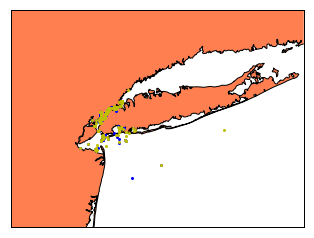

In [70]:
map = Basemap(projection='merc', lat_0 = 40.7, lon_0 = -74,
    resolution = 'h',
    llcrnrlon=-75.0, llcrnrlat=39.8,
    urcrnrlon=-71.8, urcrnrlat=41.6)

map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()

x,y = map(list(df.loc[df['pickup_onland'] == False, 'pickup_longitude']), list(df.loc[df['pickup_onland'] == False, 'pickup_latitude']))
map.plot(x, y, 'bo', markersize=2)
x,y = map(list(df.loc[df['dropoff_onland'] == False, 'dropoff_longitude']), list(df.loc[df['dropoff_onland'] == False, 'dropoff_latitude']))
map.plot(x, y, 'yo', markersize=2)
plt.show()

### are there water taxis included? That connection between the island and the mainland look an awful lot like water taxi pickups / dropoffs

I think we can strip any "water taxi" data too for now, maybe the exact pick-up/drop-off locations are ferry terminals etc. and they can be flagged.

In [72]:
df = df[(df['pickup_onland'] == True) & (df['dropoff_onland'] == True)]

In [76]:
df.size

30356823